# Task

**Úkoly:**
1. DB obsahuje mimo obecných obchodních dat i informace o zákaznících, kteří jsou členy
benefitního programu. Analyzuj tuto skupinu.
    - Zajímá nás především, jak se změnilo nákupní chování a hodnota zákazníků kteří do
programu vstoupili,
    - a porovnání se zbytkem zákazníků

2. Projdi si DB a najdi zajímavé insighty (stačí 3), které bys mohl/a nabídnout
businessu/managementu.

Translation: \
\
**Tasks:**
1. DB contain info about customers who are part of benefit program. Analyse this group.
     - How does customer behaviour change after they enter the program
     - Compare with rest of customers
   
2. Go through DB and find interesting insight (max 3) for business/management

## Data analysis for customer behaviour

### Basic Data

**First I created query to see the basic data, how many active companies there are. How are the basic data looking, how much is the spending etc.**

In [1]:
import pandas as pd

In [2]:
basic_data = pd.read_csv("first_query/first_query_basic_data.csv", delimiter=";")
basic_data

,Firm_ID,Document_ID,Product_ID,Amount,UnitPriceExclVat,PriceExclVat,TotalPriceExclVat,VatDate,ValidFrom,ValidTo,IsInBenefitProgram
0,235060,540573137,5478719.0,1.0,10239669,102397,102397,23.6.2023,NaN,NaN,False
1,235060,540573137,6657577.0,1.0,57024,5702,102397,23.6.2023,NaN,NaN,False
2,235060,540573137,6484052.0,1.0,-57024,-5702,102397,23.6.2023,NaN,NaN,False
3,2241439,541152944,6714265.0,1.0,6520661,65207,70083,26.6.2023,NaN,NaN,False
4,2241439,541152944,6234736.0,1.0,487603,4876,70083,26.6.2023,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
975732,5507898,599012109,6657577.0,1.0,57024,5702,973388,20.12.2023,NaN,NaN,False
975733,5507898,599012109,6484052.0,1.0,-57024,-5702,973388,20.12.2023,NaN,NaN,False
975734,2762760,600784283,6619057.0,1.0,23621,23621,23621,26.12.2023,NaN,NaN,False
975735,5700960,598480596,7001056.0,1.0,90000,90000,66719,19.12.2023,NaN,NaN,False


**Data are looking good. I can now see which company is in the benefit program and which is not.**
 - ValidFrom and ValidTo are NaN if the customer is not in the benefit program as it marks the day of the program start.

### Customer value

**Now I will calculate customer value based on whether they are in the benefit program or not.**
 - Based on the transactions, I should be able to get some insights into the value of the company in and outside the program.

In [3]:
customer_value = pd.read_csv("second_query/second_query_aggregated.csv", delimiter=";")
customer_value

,IsInBenefitProgram,AvgPurchaseValue,TransactionCount,TotalAmount,AvgUnitPrice,NumberOfFirms
0,False,"177538,2931",964857,1073838.0,"2847795,6985",9997
1,True,"161094,3236",10880,12394.0,"2281589,9706",136


**I learn from aggregated metrics that:**
 - **Average Purchase Value derived from total price (including both transactions + and -) is higher for firms outside of the program.** 
    - Outside: 177538,2931
    - Inside: 161094,3236
 - **Total count of transactions made is:** 
    - Outside: 964857
    - Inside: 10880
 - **Total amount of units purchased is:** 
    - Outside: 1073838.0 with average price of 2847795,6985
    - Inside: 12394.0  with average price of 2281589,9706

### Insights

1. **What I learned from average purchase value?**
    - Companies in benefit programs spend less per transaction. This can be due to 2 factors. The program either attracts companies that spend less. Or it supports making more frequent but smaller transactions. To confirm this I need to run following query:

In [4]:
transaction_count = pd.read_csv("second_query/transaction_count.csv", delimiter=";")
transaction_count 

,IsInBenefitProgram,AvgTransactionCount
0,False,26
1,True,18


**No. Companies in program does not make more frequent pruchases.**

2. **What I learned from transaction count (total)?**
    - Most of the companies (active) are not enrolled in the program. Thus it also reflects the total count of transactions. But it still provides some insight. The program might be not so interesting or it is new and companies haven't enrolled yet.

3. **What I learned from total amount of products purchased ?**
    - Companies not in program buy more products. This makes sense. There are more customers outside of the program

4. **What I learned from average unit price purchased ?**
    - This one is interesting. It seems to be that firms in the program buy lower price items. It can be due to promotions and that the program supports this decision or it can be that program is directed towards this client base.

### Analysis for customer in program and outside

In [6]:
benefit_program_basic_data = pd.read_csv("third_query/third_query_basic_data.csv", delimiter=";")
benefit_program_basic_data 

,Firm_ID,BenefitProgramPeriod,TotalSpent,TotalPurchases,AvgSpentOnTransaction
0,4561393,Never in program,"4338776,00",9,"482086,2222"
1,1506928,Never in program,"1398538,00",9,"155393,1111"
2,342884,Never in program,"1192427,00",3,"397475,6666"
3,5267583,Never in program,"46116,00",1,"46116,00"
4,3872698,Never in program,"29005014,00",129,"224845,0697"
...,...,...,...,...,...
10228,3394359,Never in program,"1547545,00",43,"35989,4186"
10229,1872024,Never in program,"236114,00",5,"47222,80"
10230,49223,Never in program,"285303,00",12,"23775,25"
10231,2108262,Never in program,"544589,00",4,"136147,25"


**This table is showing some interesting numbers but it needs some cleaning. I usually execute this in python, but in this case I add cte and remove companies outside of program.**

In [7]:
benefit_program_cleaned = pd.read_csv("third_query/third_query_cleaned.csv", delimiter=";")
benefit_program_cleaned

,Firm_ID,BenefitProgramPeriod,TotalSpent,AvgSpentOnTransaction,TotalPurchases
0,81054,After,"493802,00","246901,00",2
1,81054,Before,"772373,00","110339,00",7
2,309637,After,"5903724,00","140564,8571",42
3,309637,Before,"82562,00","82562,00",1
4,384037,After,"282732,00","56546,40",5
...,...,...,...,...,...
228,19450752,After,"201677,00","40335,40",5
229,19819512,After,"32975,00","32975,00",1
230,19920025,After,"1069256,00","1069256,00",1
231,20330998,After,"12314,00","12314,00",1


**So I have some clean data that are actually readeable. Let's go through some of them and try to visualise somthing interesting.**

### Visualisations

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


In [10]:
benefit_program_cleaned

,Firm_ID,BenefitProgramPeriod,TotalSpent,AvgSpentOnTransaction,TotalPurchases
0,81054,After,"493802,00","246901,00",2
1,81054,Before,"772373,00","110339,00",7
2,309637,After,"5903724,00","140564,8571",42
3,309637,Before,"82562,00","82562,00",1
4,384037,After,"282732,00","56546,40",5
...,...,...,...,...,...
228,19450752,After,"201677,00","40335,40",5
229,19819512,After,"32975,00","32975,00",1
230,19920025,After,"1069256,00","1069256,00",1
231,20330998,After,"12314,00","12314,00",1


In [11]:
benefit_program_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Firm_ID                233 non-null    int64 
 1   BenefitProgramPeriod   233 non-null    object
 2   TotalSpent             233 non-null    object
 3   AvgSpentOnTransaction  233 non-null    object
 4   TotalPurchases         233 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.2+ KB


 - **I need to recast some data types**

In [12]:
benefit_program_cleaned['Firm_ID'] = benefit_program_cleaned['Firm_ID'].astype(str)

benefit_program_cleaned['TotalSpent'] = benefit_program_cleaned['TotalSpent'].str.replace(',', '.')
benefit_program_cleaned['TotalSpent'] = benefit_program_cleaned['TotalSpent'].astype(float)

benefit_program_cleaned['AvgSpentOnTransaction'] = benefit_program_cleaned['AvgSpentOnTransaction'].str.replace(',', '.')
benefit_program_cleaned['AvgSpentOnTransaction'] = benefit_program_cleaned['AvgSpentOnTransaction'].astype(float)

In [14]:
benefit_program_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Firm_ID                233 non-null    object 
 1   BenefitProgramPeriod   233 non-null    object 
 2   TotalSpent             233 non-null    float64
 3   AvgSpentOnTransaction  233 non-null    float64
 4   TotalPurchases         233 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ KB


In [13]:
benefit_program_cleaned.describe()

,TotalSpent,AvgSpentOnTransaction,TotalPurchases
count,233.00,233.00,233.00
mean,1433154.14,173461.39,10.89
std,1960491.30,256215.43,11.34
min,-109415.00,-5210.24,1.00
25%,324379.00,60911.27,3.00
50%,871412.00,101075.33,7.00
75%,1923768.00,198161.00,15.00
max,19000499.00,2897686.00,78.00


- **There are massive outliers**

In [15]:
benefit_program_cleaned_pivot = benefit_program_cleaned.pivot(index='Firm_ID', columns='BenefitProgramPeriod', values='TotalSpent')
benefit_program_cleaned_pivot['Before'] = benefit_program_cleaned_pivot['Before'].fillna(0)
benefit_program_cleaned_pivot = benefit_program_cleaned_pivot.reset_index()
benefit_program_cleaned_pivot

BenefitProgramPeriod,Firm_ID,After,Before
0,10018187,681236.00,1724447.00
1,10229858,270919.00,0.00
2,10512917,2265879.00,0.00
3,10944193,2406798.00,0.00
4,10997020,813314.00,0.00
...,...,...,...
131,9634409,562215.00,28016.00
132,9759237,283216.00,464228.00
133,988343,1020626.00,73793.00
134,9924919,565979.00,537108.00


- **It could be that company joined benefit program right away**

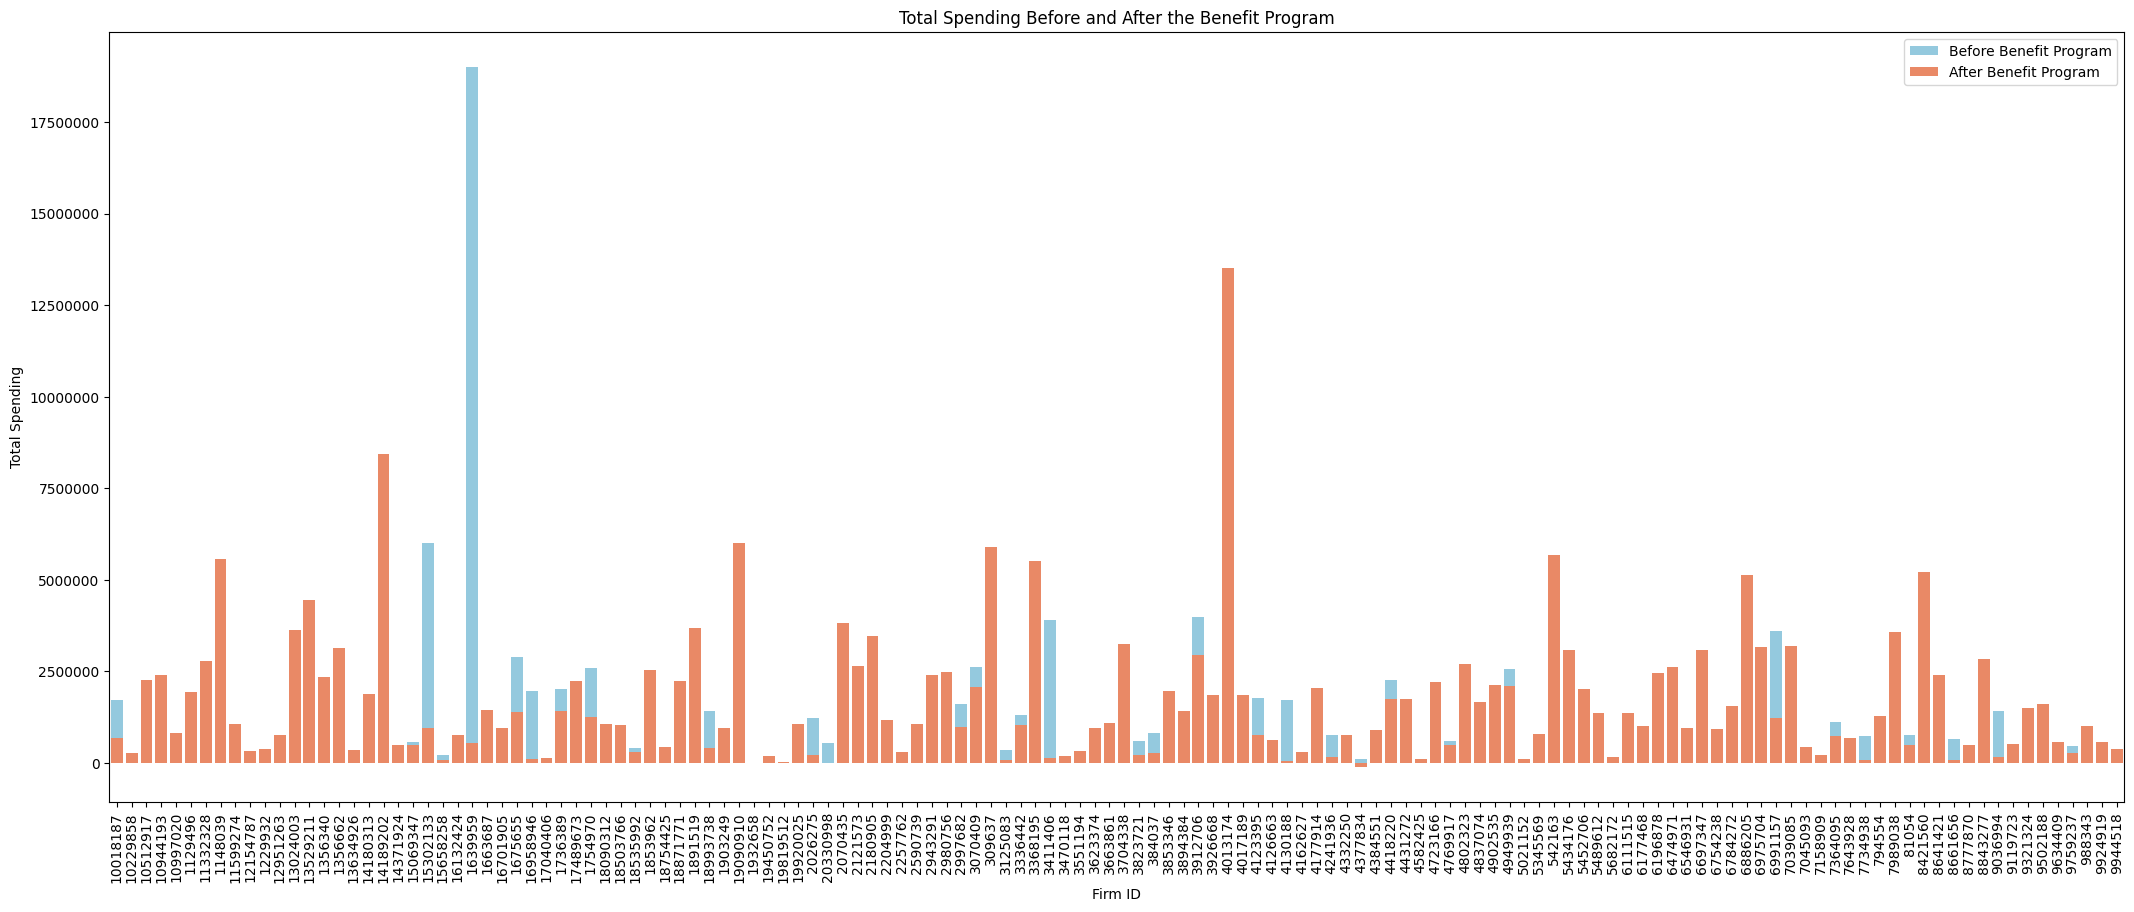

In [18]:
plt.figure(figsize=(26, 10))
sns.barplot(data=benefit_program_cleaned_pivot, x='Firm_ID', y='Before', color='skyblue', label='Before Benefit Program')
sns.barplot(data=benefit_program_cleaned_pivot, x='Firm_ID', y='After', color='coral', label='After Benefit Program')

plt.title('Total Spending Before and After the Benefit Program')
plt.xlabel('Firm ID')
plt.ylabel('Total Spending')

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)


plt.xticks(rotation=90)
plt.legend()

plt.show()

- **This presents some results. But I want to remove 2 massive outliers. Usually I would select values based on percentage for example anything higher then 90% of standard values of total spend. But in this case I just go with 2 specific Ids.**

In [23]:
benefit_program_cleaned_pivot_copy = benefit_program_cleaned_pivot.copy()
id_exclude = ['1639959', '4013174']
benefit_program_cleaned_pivot_copy = benefit_program_cleaned_pivot_copy[~benefit_program_cleaned_pivot_copy['Firm_ID'].isin(id_exclude)]
benefit_program_cleaned_pivot_copy.head(20)

BenefitProgramPeriod,Firm_ID,After,Before
0,10018187,681236.00,1724447.00
1,10229858,270919.00,0.00
2,10512917,2265879.00,0.00
3,10944193,2406798.00,0.00
4,10997020,813314.00,0.00
5,1129496,1923768.00,0.00
6,11332328,2797261.00,181916.00
7,1148039,5559197.00,0.00
8,11599274,1060241.00,737222.00
9,12154787,312976.00,0.00


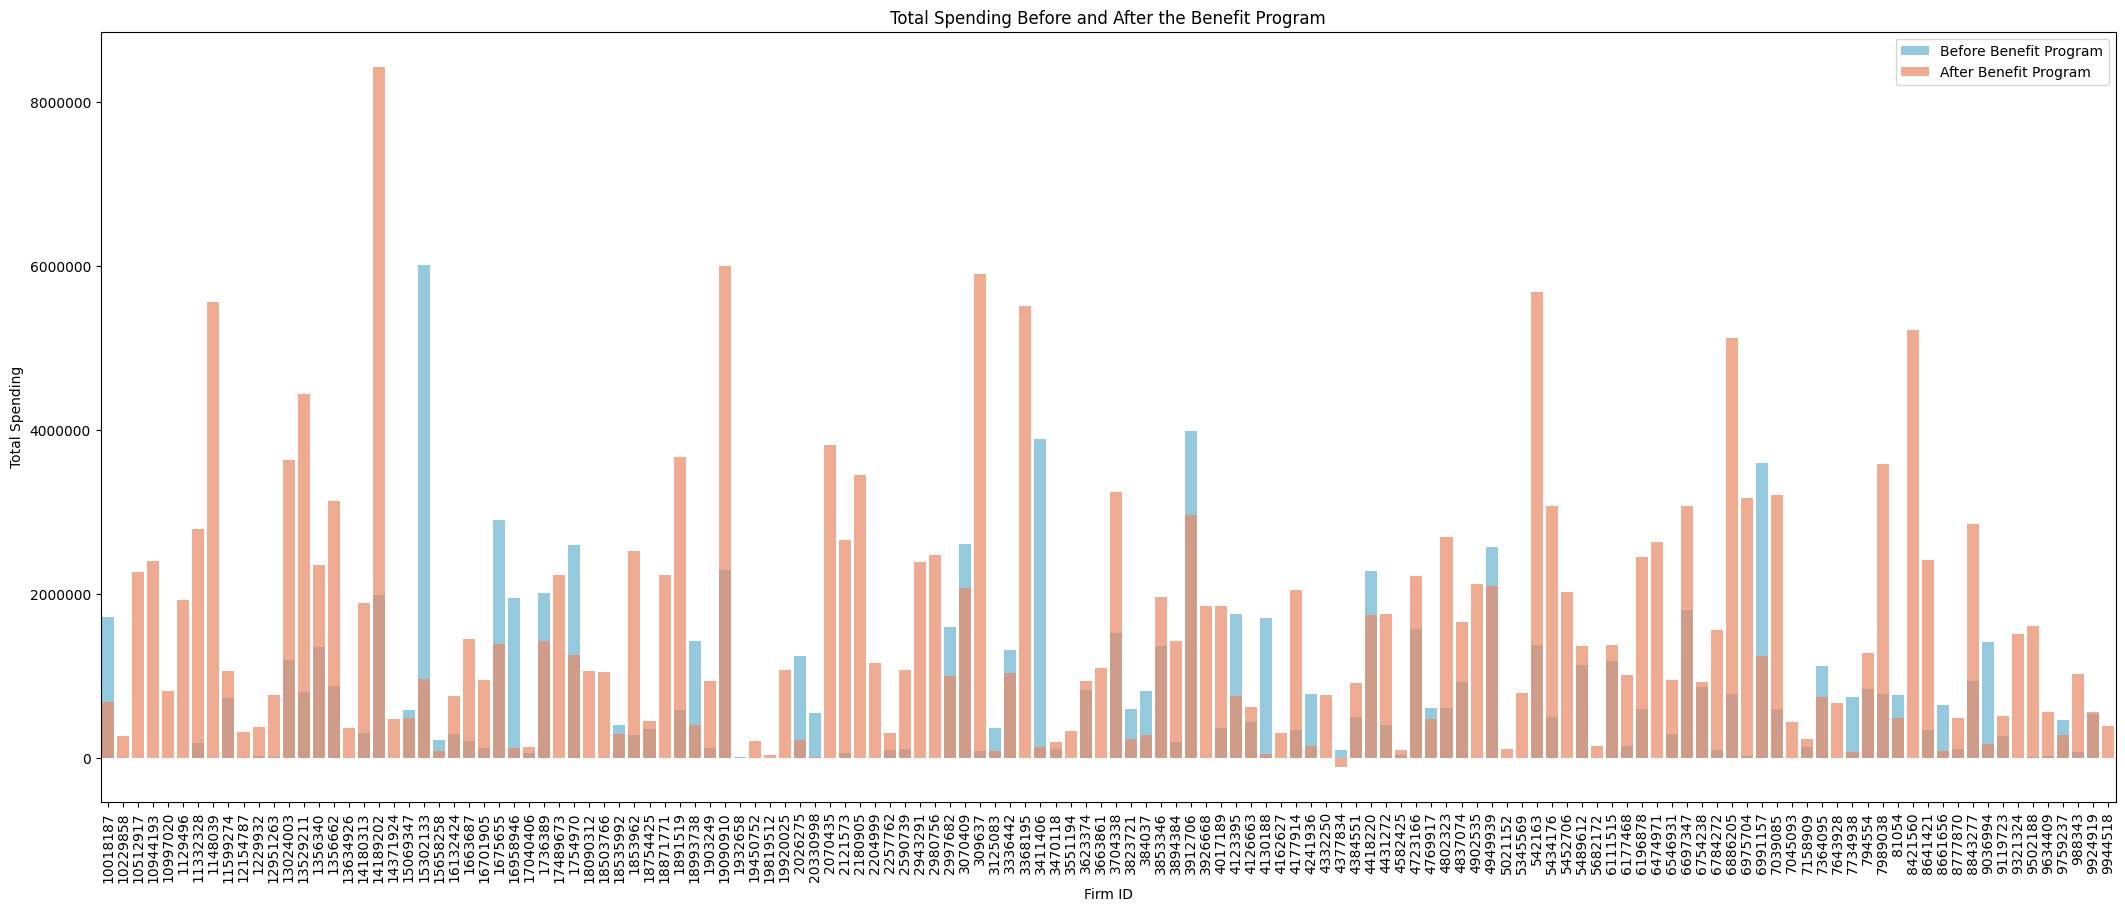

In [24]:
plt.figure(figsize=(26, 10))
sns.barplot(data=benefit_program_cleaned_pivot_copy, x='Firm_ID', y='Before', color='skyblue', label='Before Benefit Program', alpha=1)
sns.barplot(data=benefit_program_cleaned_pivot_copy, x='Firm_ID', y='After', color='coral', label='After Benefit Program', alpha=0.7)

plt.title('Total Spending Before and After the Benefit Program')
plt.xlabel('Firm ID')
plt.ylabel('Total Spending')

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False) 


plt.xticks(rotation=90)
plt.legend()

plt.show()

**This bar plot shows the total spending for each firm before and after the benefit program. And it is quite interesting. I would determine that joining the benefits program was beneficial for this type of company. They seem to improve their shopping behaviour.**
 - Removed outlier with ID '1639959' significantly dropped their spending after joining the program. But this can be due to dataframe limitations. I would personally track the behaviour specifically for this company as they are pretty important customer.
 - Removed outlier with ID '4013174' did the opposite and went from 351236,00 spending before joining the program to 13502661,00 after joining the program. 
 - There are customers with a significant impact on spending after joining the program. I would suggest looking towards these more.

In [25]:
benefit_program_cleaned_purchases_pivot = benefit_program_cleaned.pivot(index='Firm_ID', columns='BenefitProgramPeriod', values='TotalPurchases')
benefit_program_cleaned_purchases_pivot['Before'] = benefit_program_cleaned_purchases_pivot['Before'].fillna(0)
benefit_program_cleaned_purchases_pivot['After'] = benefit_program_cleaned_purchases_pivot['After'].fillna(0)

benefit_program_cleaned_purchases_pivot = benefit_program_cleaned_purchases_pivot.reset_index()
benefit_program_cleaned_purchases_pivot['Before'] = benefit_program_cleaned_purchases_pivot['Before'].astype(int)
benefit_program_cleaned_purchases_pivot['After'] = benefit_program_cleaned_purchases_pivot['After'].astype(int)

In [26]:
benefit_program_cleaned_purchases_pivot

BenefitProgramPeriod,Firm_ID,After,Before
0,10018187,9,7
1,10229858,6,0
2,10512917,34,0
3,10944193,13,0
4,10997020,2,0
...,...,...,...
131,9634409,5,1
132,9759237,6,6
133,988343,9,2
134,9924919,9,4


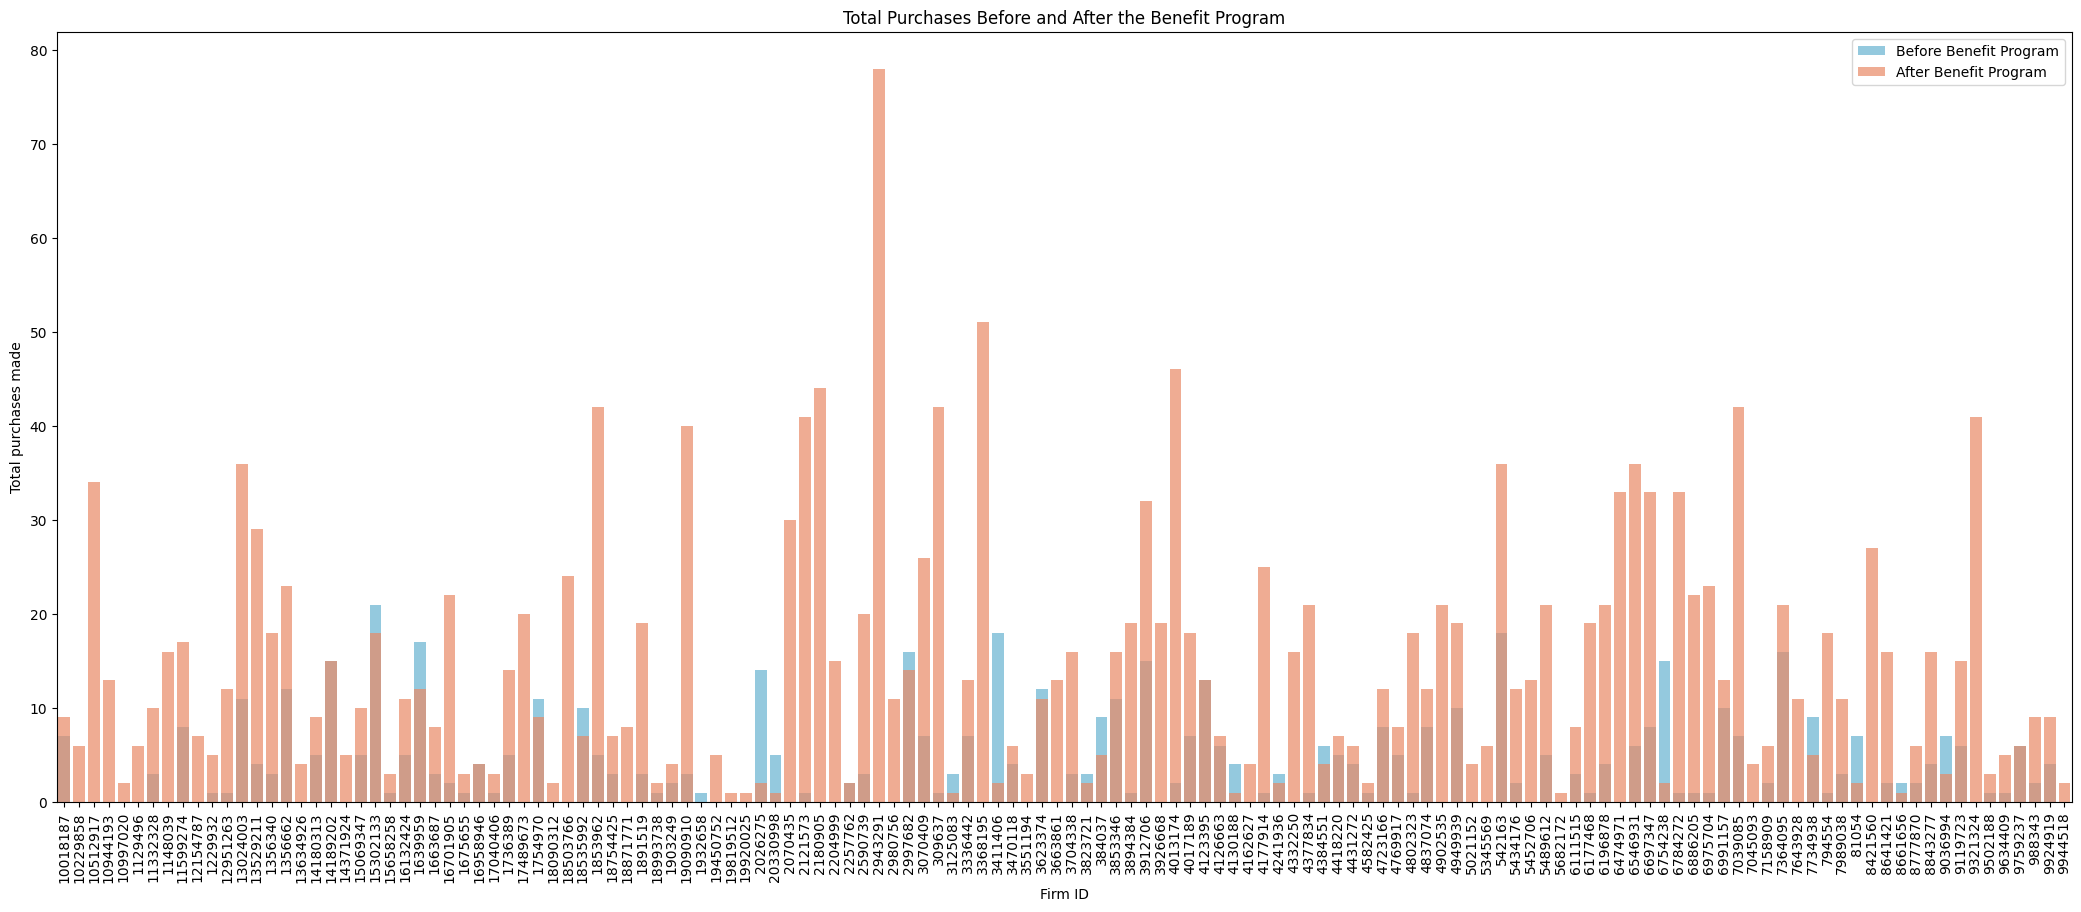

In [27]:
plt.figure(figsize=(26, 10))
sns.barplot(data=benefit_program_cleaned_purchases_pivot, x='Firm_ID', y='Before', color='skyblue', label='Before Benefit Program', alpha=1)
sns.barplot(data=benefit_program_cleaned_purchases_pivot, x='Firm_ID', y='After', color='coral', label='After Benefit Program', alpha=0.7)

plt.title('Total Purchases Before and After the Benefit Program')
plt.xlabel('Firm ID')
plt.ylabel('Total purchases made')

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)


plt.xticks(rotation=90)
plt.legend()

plt.show()

**Total purchases also increases with benefit program start. Most of companies increase their number of purchases**

#### Data suggests that the program may had a positive impact on increasing the total spending and number of purchases after the company joined the program. At least in most companies. Some companies that have an actual decrease in spending should be examined, especially with big clients such as companies with Firm_id = '1639959'

- **Agreggated query to show value of customers not in program and in program**

In [28]:
aggregated_data = pd.read_csv("fourth_query/fourth_query_aggregated.csv", delimiter=";")
aggregated_data 

,IsInBenefitProgram,TotalSpent,AvgSpent,TotalPurchases
0,False,"40235252409,00","4023525,2409",269674
1,True,"333924915,00","2455330,2573",2538


**The key observations from this table are:** 
 - Companies spending before or never entering the program was 40235252409,00 with avg 4023525,2409 and a total amount of purchases 269674.**
 - Companies spending after entering the program was 333924915,00 with avg 2455330,2573 and a total amount of purchases 2538.**
 - Overall the benefit program attracts customers that appear to spend less in total and make a smaller number of total purchases. If the program targets this specific customer segment, then the data confirm that after joining the program, customers spend more and make purchases more often.
 - Even though average spending is lower than by customers not in the program, customers not in the program are  a larger group. The total spend amount by customers in the benefit program is proportionally still large. If we consider that in the program are only 136 customers, and not in the program are 9997 customers, these are still impressive numbers.

### SUM UP

1. **Customers not in the program spend more on average and also make more purchases. They are also the largest group of customers with the highest total amount spent.**
2. **After joining the program customers tend to spend more and to do more purchases. In the visualisation is clear that customers make more purchases and that their behaviour positively changes toward higher spending.**
3. **Customers in the program are smaller customer segments but the total amount spent and number of purchases are still impressive as there are approximately 73 times more companies not enlisted in the program than are. Thus benefit programs should be supported additionally to increase customer base.**